In [65]:
%pylab inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import *
from sympy import *
init_printing(use_unicode=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Primera aproximacion a el calculo simbolico con sympy
def simple(o1,o2):
    t1,t2=symbols('t%d t%d'%(o1,o2))
    denominador=(t1-t2)**o1
    numerador=(t1+t2)**o2
    division=div(numerador, denominador)
    return division

In [3]:
simple(5,7)

In [4]:
# Segunda aproximacion a sympy
def simple2(n):
    x=var('t%d'%n)
    return x**n

In [5]:
simple2(4)

#Calculo symbolico
##(a) Polinomios de lagrange

In [6]:
# Primer punto de la tarea parte a
def lagrange(orden):
    # Se asigna un valor simbolico a la as variable t   
    t=var('t')
    
    # Se declaran dos arreglos uno para los valores de f y sus subindices, lo mismo para t
    F=[]
    T=[]
    
    # Se inicializa los valores de t y f segun el orden que entro por parametro
    for i in range(orden):
        F.append(var('f%d'%i))
        T.append(var('t%d'%i))
    
    # Se inicializa la variable d la expresion para el polinomio 
    adam=0
    
    # Se recoren los arreglos que tinene los valores de f y t para generar el polinomio
    for n in range(orden):
        adamParcial=F[n]
        for i in range(orden):
            if i!=n:
                adamParcial=adamParcial*(t-T[i])/(T[n]-T[i])   
        adam=adam+adamParcial
        
    #La fucion retorna el polinomio
    return adam

    
   
    

In [7]:
lagrange(1)

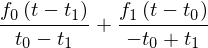

In [8]:
lagrange(2)

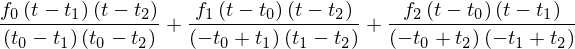

In [9]:
lagrange(3)

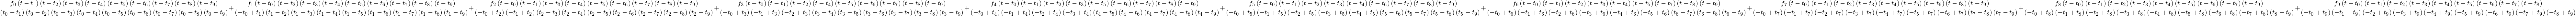

In [10]:
lagrange (10)

##(b) Adams Bashford

In [11]:
# segundo punto a partir de modificar un poco el metodo anterior
def adams1(orden):
    # Se asigna un valor simbolico a la as variable t y h  
    t=var('t')
    h=var('h')
    
    # Se declaran dos arreglos uno para los valores de f y sus subindices, lo mismo para t
    F=[]
    T=[]
    
    # Se inicializa los valores de t y f segun el orden que entro por parametro
    for i in range(orden):
        F.append(var('f%d'%i))
        T.append(var('t%d'%i))
    print T[0]
    # Se inicializa la variable d la expresion para el polinomio 
    adam=0
    
    # Se recorren los arreglos para generara los polinomios
    for n in range(orden):
        #se rehacen los cambios de t para poder hacer la integración
        for k in range(1,orden):
            T[k]=T[0]-(h*k)
        adamParcial=F[n]
        for i in range(orden):
            if i!=n:
                adamParcial=adamParcial*(t-T[i])/(T[n]-T[i])   
        adam=adam+adamParcial
    # Se integra el polinomio
    legendre=integrate(adam,(t,T[0],T[0]+h))
    # Se devuelve el polinomio simplificado
    return simplify(legendre)

In [12]:
def adams(order):
    #se inicializa la variable h 
    h=var('h')
    
    #se llama al metodo del punto anterior para obtener el polinomio
    adam=lagrange(order)
    
    # se inicializan dos arreglos para la variable y valores a cambiar
    variable=[]
    replace=[]
    # Se genean las variable y sus cambios en el los arreglos
    for l in range(1,order):
        variable.append(var('t%d'%l))
        replace.append(t0-l*h)
        
    # Se generan los cambios de symbolos necesarios 
    for k in range(1,order):
        adam=adam.xreplace({variable[k-1]:replace[k-1]})
    
    # se integra el polinomio con los cambios necesarios 
    adams=integrate(adam,(t,t0,t0+h))
    
    #devuele la integral simplificada
    return simplify(adams)

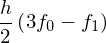

In [13]:
adams(2)

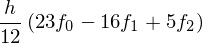

In [14]:
adams(3)

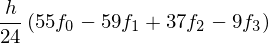

In [15]:
adams(4)

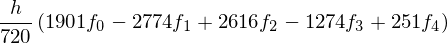

In [16]:
adams(5)

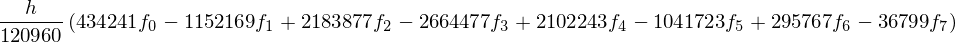

In [17]:
adams(8)

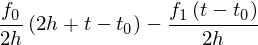

In [18]:
# Aproximacion a la funcion xreplace de sympy
adam=lagrange(2)
H=[t,t1]
r=[t0-2*h]
adam.xreplace({H[1]:r[0]})

In [19]:
# Aproximacion a la funcion xreplace de sympy
def prueba2 (orden):
    separable=lagrange(orden)
    print separable
    s= separable.xreplace({t1: 2})
    return s

In [20]:
x=var('x')
y=var('y')
t=(x**2 + x**4)
print t
t.xreplace({x: y})
print t
#t=x**2+y**2
#t.subs(x,y)
#print t

x**4 + x**2
x**4 + x**2


In [21]:
# Aproximacion a los comados basicos de sympy 
x,y=symbols('x,y')
Add(x,y)

#Ecuacion de Poisson

In [280]:
# Definicion de constantes 
lmin=-1500

lmax=1500

densidad=400.

g=6.67*10**-11

masaCuboInterior=densidad*cuboInterior**3

division=((lmax*2)/30)+1

iteraciones=2000


In [319]:
#se generan los espacios para cada dimencion
X=np.linspace(lmin,lmax, division)
Y=np.linspace(lmin,lmax, division)
Z=np.linspace(lmin,lmax, division)

# se insertan todos los ejes en una matris usando meshgrid
x,y,z=np.meshgrid(X,Y,Z)

# se define el diferencial con el cual se recorrera e cubo,
# como la loongitud el cubo sobre el numero de espacios en los que se divide cada dimencion.
delta=30
dx =(lmax-lmin)/division

# Se define el espacio en el que se calculara el potencial
espacio=np.zeros((division,division,division))

# Se establece el punto central en el espacio como la mitada de cualquiera de los lados
centro=int(division/2)

# se genera el cubo que se prentende en el centro del espacioya cada cara mine mas o menos 270 de lado.
#pues (3000/101)*10~270
cube=np.ones((10,10,10))


# Se da el valor de masa a cada espacio del cubo teniendo en cuanta su densidad.
cube=cube*densidad


# Se introduce el cubo a el espacio definido anteriormente
espacio[(centro-(len(cube)/2)):(centro+(len(cube)/2)),(centro-(len(cube)/2)):(centro+(len(cube)/2)),(centro-(len(cube)/2)):(centro+(len(cube)/2)),]=cube

espacio=espacio*4*np.pi*g*30**2

# Definicion del vector unitario
r=np.sqrt((x*x+0.1)+(y*y)+(z*z))

# Se define el potencial de poisson
potencial=-(g*densidad*(delta**3))/r

# Por metodo de relajacion se calcula el potencial gravitacional
for __ in range(1000):
    potencial=1/6.*(np.roll(potencial,1,axis=0)+
              np.roll(potencial,-1,axis=0)+
              np.roll(potencial,1,axis=1)+
              np.roll(potencial,-1,axis=1)+
              np.roll(potencial,1,axis= 2)+
              np.roll(potencial,-1,axis= 2)-
              espacio)
    potencial[0]=0.
    potencial[-1]=0.
    potencial[:,0]=0.
    potencial[:,-1]=0.
    potencial[:,:,0]=0.
    potencial[:,:,-1]=0.

    

<a list of 5 text.Text objects>

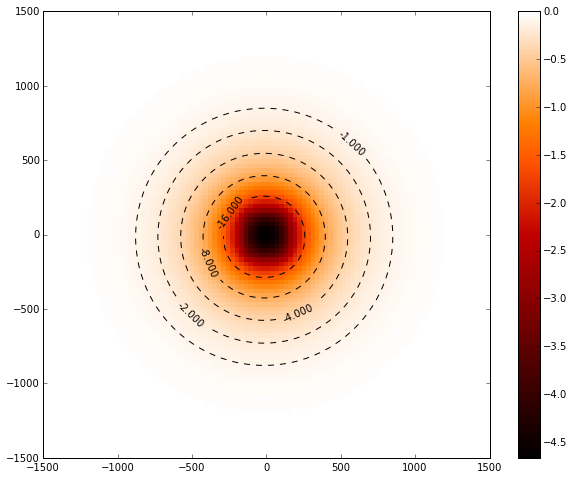

In [328]:
px,py=meshgrid(X,Y)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
fig.colorbar(ax.pcolor(px, py,potencial[50]*1000, cmap='gist_heat'))
clabel(contour(px, py,potencial[50]*10000, [-16,-8,-4,-2,-1], colors = 'Black'))


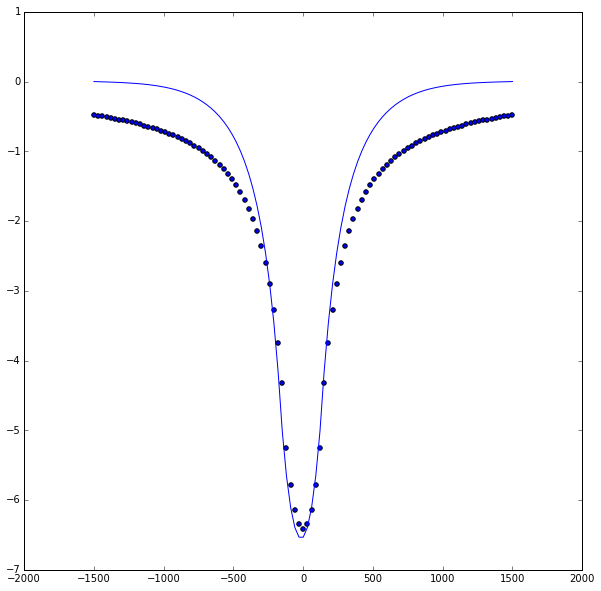

In [348]:


longitud=linspace(lmin,lmax,division)
C=densidad*(270**3)*g/1500
plt.figure(figsize=(10,10))
plt.plot(X,potencial[division/2,division/2]*1400)
plt.scatter(z[50,50,:],(Segundoespacio[50,50,:])) 
plt.show()



In [264]:
espacio3 = (np.roll(potencial[50,50,:],-1)-roll(potencial[50,50,:],1))/(2.*30) 
espacio3 = espacio3[1:-1]


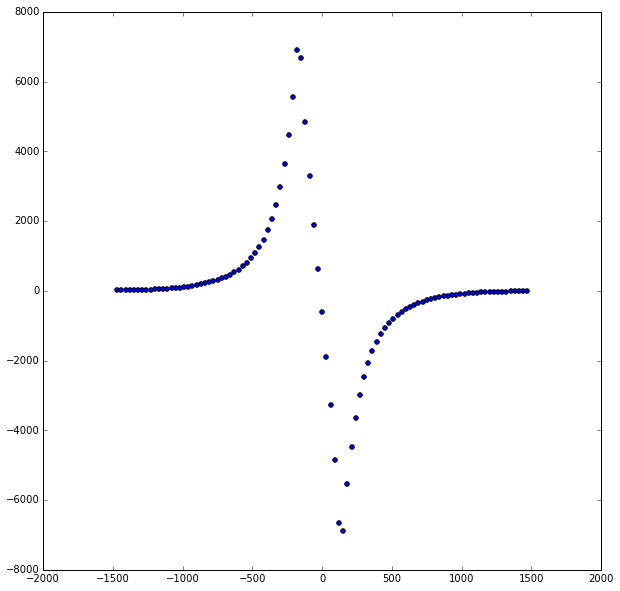

In [265]:
longitud=linspace(lmin,lmax,division)
plt.figure(figsize=(10,10))
plt.scatter(longitud[1:-1],-espacio3*1000000)